In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [94]:
class KalmanFilter:
    def __init__(self, sigma_x):
        self.P = np.array([[sigma_x*sigma_x, 1000.0*sigma_x], [1000.0*sigma_x, 1000000.0]])
        self.Q = np.ones((2,2)) * 0.1
        self.R = np.ones((1,1)) * (sigma_x*sigma_x)
        self.is_init = False
        
    def predict(self, dt):
        A = np.array([[1.0, dt],[0.0, 1.0]])
        self.x = A.dot(self.x)
        A_t = np.transpose(A)
        self.P = A.dot(self.P).dot(A.T) + self.Q
    
    def update(self, measurement):
        H = np.array([[1.0, 0.0]])
        
        PHt = self.P.dot(H.T)
        S = H.dot(PHt) + self.R
        S_i = np.linalg.inv(S)
        
        K = PHt.dot(S_i)
        print ('K = ', K)
        
        z = np.array([[measurement]])
        
        self.x = self.x + K.dot(z - H.dot(self.x))
        I = np.identity(2)
        self.P = (I - K.dot(H)).dot(self.P)
        
    def process(self, measurement, dt):
        print ('-'*50)
        print ('measurement = ', measurement)
        if not self.is_init:
            self.x = np.array([[measurement],[0.0]])
            self.is_init = True
            return
        print ('x = ')
        print (self.x)
        self.predict(dt)
        print ('x_predicted = ')
        print ( self.x)
        self.update(measurement)
        print ('x_ouput = ', self.x)

    def state(self):
        return self.x

    def covar(self):
        return self.P

In [116]:
sigma = 1.0
v = 10.0
dt = 1.0

x_actual = 10.0
v_actual = v

kf = KalmanFilter(sigma)
no_iter = 1000

measured = []
actual = []
position = []
vs = []
covars = []
t = range(no_iter)


for i in t:
    x_measured = random.gauss(x_actual, sigma)
    kf.process(x_measured, dt)

    measured.append(x_measured - x_actual)
    actual.append(x_actual)
    position.append(kf.state()[0][0] - x_actual)
    vs.append(kf.state()[1] - v_actual)
    covars.append(kf.covar()[0][0])

    x_actual += v*dt

--------------------------------------------------
measurement =  10.666486629732727
--------------------------------------------------
measurement =  20.095563614665426
x = 
[[ 10.66648663]
 [  0.        ]]
x_predicted = 
[[ 10.66648663]
 [  0.        ]]
K =  [[ 0.999999]
 [ 0.999   ]]
x_ouput =  [[ 20.0955542 ]
 [  9.41964793]]
--------------------------------------------------
measurement =  29.694521706866702
x = 
[[ 20.0955542 ]
 [  9.41964793]]
x_predicted = 
[[ 29.51520213]
 [  9.41964793]]
K =  [[ 0.8037677 ]
 [ 0.41149954]]
x_ouput =  [[ 29.65933341]
 [  9.49343785]]
--------------------------------------------------
measurement =  40.96596346407533
x = 
[[ 29.65933341]
 [  9.49343785]]
x_predicted = 
[[ 39.15277126]
 [  9.49343785]]
K =  [[ 0.66237358]
 [ 0.25206724]]
x_ouput =  [[ 40.35378187]
 [  9.95048421]]
--------------------------------------------------
measurement =  49.268319676401006
x = 
[[ 40.35378187]
 [  9.95048421]]
x_predicted = 
[[ 50.30426607]
 [  9.9504842

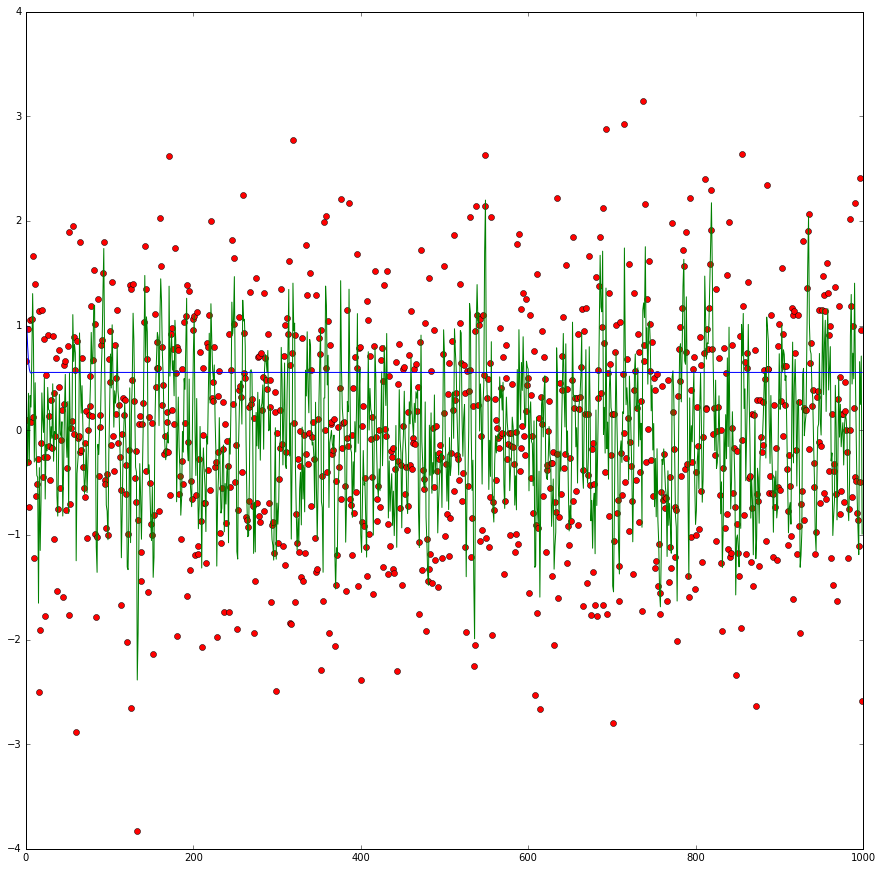

In [117]:
plt.figure(figsize=(15, 15))
plt.plot(t, measured, 'ro', t, position, 'g', t, covars, 'b')
plt.show()

In [118]:
print (sum([x*x for x in measured])/len(measured))
print (sum([x*x for x in position])/len(measured))
print (covars[-1])

1.0378582724695045
0.483274831932
0.553073000777


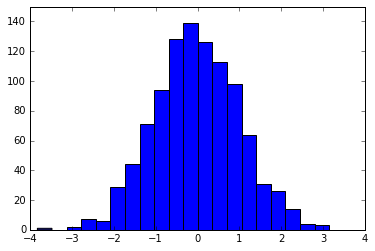

In [124]:
plt.hist(measured, 20)
plt.axis([-4, 4, 0, 150])
plt.show()

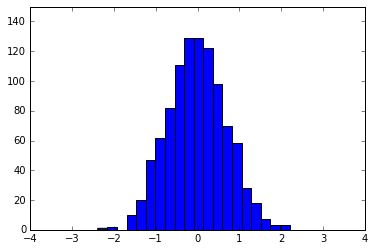

In [125]:
plt.hist(position, 20)
plt.axis([-4, 4, 0, 150])
plt.show()